In [206]:
#%matplotlib widget #need this for click GUIs
import qubic.toolchain as tc
import qubic.run as rc
import qubitconfig.qchip as qc
from distproc.hwconfig import FPGAConfig, load_channel_configs
import numpy as np
import matplotlib.pyplot as plt
import chipcalibration.rabi_amp_sweep as rabi
from importlib import reload
import qubic.state_disc as sd

In [207]:
# instantiate runner and load xsa file (i.e. PL bitfile)
# use load_xsa=False if you don't want to reload bitfile
runner = rc.CircuitRunner()

In [174]:
fpga_config = FPGAConfig(**{'fpga_clk_period': 2.e-9, 'alu_instr_clks': 5, 'jump_cond_clks': 5, 'jump_fproc_clks': 5, 'pulse_regwrite_clks': 3})

qchipname = 'X4Y2'
qchip = qc.QChip('../submodules/qchip/X4Y2/X4Y2.json')
chanmap = {'Q0':2,'Q2':1,'Q1':4,'Q3':3,'Q4':5,'Q5':6,'Q6':7}

channel_config = load_channel_configs('../submodules/qchip/X4Y2/channel_config.json')

In [210]:
target_qubits = ['Q0', 'Q1', 'Q2', 'Q3']
#target_qubits = ['Q3']
target_twidth = 24e-9

In [211]:
reload(rabi)
num_partitions = 25
irabi = rabi.RabiAmpSweeper(target_qubits, target_twidth, qchip, fpga_config, channel_config, num_partitions=num_partitions)

done resolving block
done z-resolving block
done resolving block
done z-resolving block
done scheduling
done resolving block
done z-resolving block
done resolving block
done z-resolving block
done scheduling
done resolving block
done z-resolving block
done resolving block
done z-resolving block
done scheduling
done resolving block
done z-resolving block
done resolving block
done z-resolving block
done scheduling
done resolving block
done z-resolving block
done resolving block
done z-resolving block
done scheduling
done resolving block
done z-resolving block
done resolving block
done z-resolving block
done scheduling
done resolving block
done z-resolving block
done resolving block
done z-resolving block
done scheduling
done resolving block
done z-resolving block
done resolving block
done z-resolving block
done scheduling
done resolving block
done z-resolving block
done resolving block
done z-resolving block
done scheduling
done resolving block
done z-resolving block
done resolving block

done resolving block
done z-resolving block
done resolving block
done z-resolving block
done scheduling
done resolving block
done z-resolving block
done resolving block
done z-resolving block
done scheduling
done resolving block
done z-resolving block
done resolving block
done z-resolving block
done scheduling
done resolving block
done z-resolving block
done resolving block
done z-resolving block
done scheduling
done resolving block
done z-resolving block
done resolving block
done z-resolving block
done scheduling
done resolving block
done z-resolving block
done resolving block
done z-resolving block
done scheduling
done resolving block
done z-resolving block
done resolving block
done z-resolving block
done scheduling
done resolving block
done z-resolving block
done resolving block
done z-resolving block
done scheduling
done resolving block
done z-resolving block
done resolving block
done z-resolving block
done scheduling
done resolving block
done z-resolving block
done resolving block

In [196]:
# fit is A*sin(2*pi*x/drive_period + phi) + B, params are [A, B, drive_period, phi]
prior_fit_params = {
    'Q0' : [-0.5, 0.5, 0.5, 0], 
    'Q1' : [-0.5, 0.5, 0.8, 0], 
    'Q2' : [-0.5, 0.5, 0.8, 0], 
    'Q3' : [-0.5, 0.5, 0.8, 0], 
    'Q4' : [-0.5, 0.5, 0.8, 0], 
    'Q5' : [-0.5, 0.5, 0.8, 0], 
}

In [197]:
irabi.run_and_fit(runner, 1000, prior_fit_params)

Taking data for qubit Q0 in batch 1 of 4


100%|██████████| 25/25 [00:26<00:00,  1.08s/it]


Taking data for qubit Q1 in batch 2 of 4


100%|██████████| 25/25 [00:26<00:00,  1.08s/it]


Taking data for qubit Q2 in batch 3 of 4


100%|██████████| 25/25 [00:26<00:00,  1.08s/it]


Taking data for qubit Q3 in batch 4 of 4


100%|██████████| 25/25 [00:26<00:00,  1.08s/it]


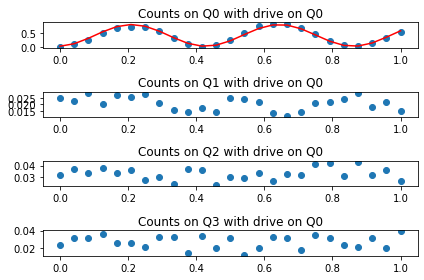

In [198]:
irabi.show_count_oscillations('Q0', target_qubits, show_fits=True)

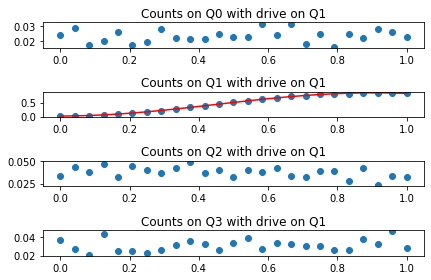

In [199]:
irabi.show_count_oscillations('Q1', target_qubits, show_fits=True)

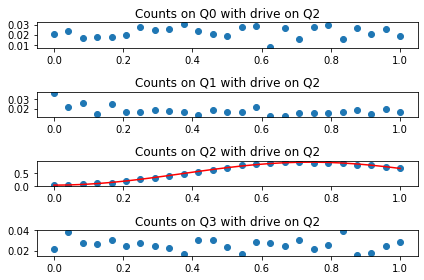

In [200]:
irabi.show_count_oscillations('Q2', target_qubits, show_fits=True)

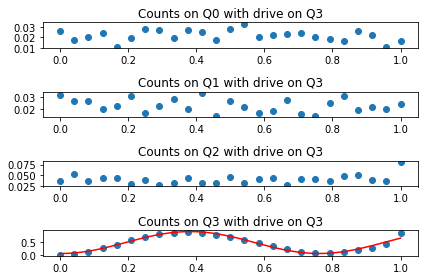

In [201]:
irabi.show_count_oscillations('Q3', target_qubits, show_fits=True)

In [204]:
calibrated_X90_drive_amps = {qid: irabi.fits[qid][0][2]/4 for qid in target_qubits}

In [205]:
print(calibrated_X90_drive_amps)

{'Q0': 0.10846836047954282, 'Q1': 0.45624646710045597, 'Q2': 0.3699477309448735, 'Q3': 0.18955173016636584}


In [203]:
irabi.update_qchip(qchip)
qchip.save('../submodules/qchip/X4Y2/X4Y2_rabi_amp_cal.json')

## DEBUG WORK

In [143]:
q3counts = np.average(irabi.dataset['Q3']['Q3'], axis=1).flatten()
q1counts = np.average(irabi.dataset['Q1']['Q1'], axis=1).flatten()
q2counts = np.average(irabi.dataset['Q2']['Q2'], axis=1).flatten()

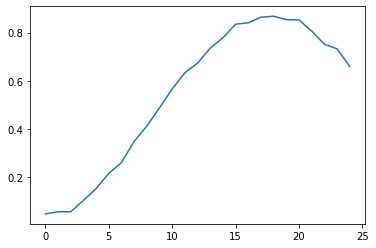

In [149]:
plt.plot(q2counts)

In [111]:
import numpy.fft as fft

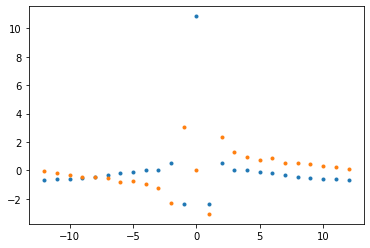

In [151]:
plt.plot(np.fft.fftfreq(len(q3counts), 1/len(q3counts)), np.real(fft.fft(q3counts)), '.')
plt.plot(np.fft.fftfreq(len(q3counts), 1/len(q3counts)), np.imag(fft.fft(q3counts)), '.')

In [146]:
np.argmax(np.abs(fft.rfft(q3counts)[1:]))

0

In [83]:
fft.rfftfreq(len(q3counts))

array([0.  , 0.04, 0.08, 0.12, 0.16, 0.2 , 0.24, 0.28, 0.32, 0.36, 0.4 ,
       0.44, 0.48])

In [85]:
1/0.04

25.0

In [117]:
np.fft.fftfreq(len(q3counts), 1/len(q3counts))

array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12., -12., -11., -10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,
        -3.,  -2.,  -1.])

In [101]:
np.fft.fft

<function numpy.fft.fft(a, n=None, axis=-1, norm=None)>

In [158]:
irabi._fit_count_data(prior_fit_params, False)

In [213]:
import pickle as pkl

In [214]:
pkl.dump?

In [223]:
with open('gmm_test.pkl', 'rb') as f:
    gmm_load = pkl.load(f)

In [226]:
irabi.gmm_manager.gmm_dict

{}